In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

save_best = ModelCheckpoint('./best_model.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=(validation_dataset), callbacks=[es, save_best])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dense (Dense)               (None, 512)               7873024   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 7874498 (30.04 MB)
Trainable params: 7874498 (30.04 MB)
Non-trainable params: 0 (0.00 Byte)
________________

C:\Users\student\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 7s 216ms/step - loss: 1.4767 - accuracy: 0.5151 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/100
31/31 [==============================] - 6s 183ms/step - loss: 0.6976 - accuracy: 0.5109 - val_loss: 0.6703 - val_accuracy: 0.6417
Epoch 3/100
31/31 [==============================] - 6s 186ms/step - loss: 0.6257 - accuracy: 0.6791 - val_loss: 0.6222 - val_accuracy: 0.6125
Epoch 4/100
31/31 [==============================] - 6s 180ms/step - loss: 0.5542 - accuracy: 0.7383 - val_loss: 0.5448 - val_accuracy: 0.7958
Epoch 5/100
31/31 [==============================] - 6s 178ms/step - loss: 0.4968 - accuracy: 0.7674 - val_loss: 0.5436 - val_accuracy: 0.7417
Epoch 6/100
31/31 [==============================] - 5s 172ms/step - loss: 0.4532 - accuracy: 0.7944 - val_loss: 0.4493 - val_accuracy: 0.8167
Epoch 7/100
31/31 [==============================] - 5s 159ms/step - loss: 0.4116 - accuracy: 0.8120 - val_loss: 0.4685 - val_accuracy: 0.7917
Epoch 8/100

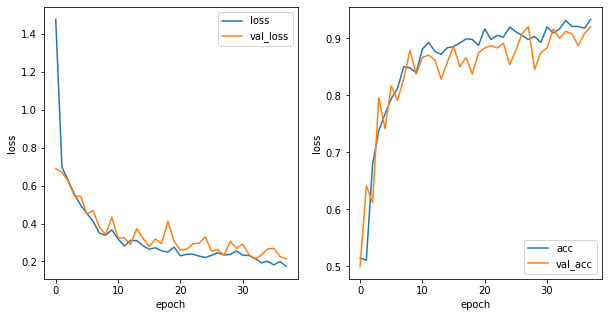

In [4]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()